In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/test.csv
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test/33.jpg
/kaggle/input/dataset/test/414.jpg
/kaggle/input/dataset/test/11.jpg
/kaggle/input/dataset/test/217.jpg
/kaggle/input/dataset/test/375.jpg
/kaggle/input/dataset/test/196.jpg
/kaggle/input/dataset/test/301.jpg
/kaggle/input/dataset/test/349.jpg
/kaggle/input/dataset/test/170.jpg
/kaggle/input/dataset/test/275.jpg
/kaggle/input/dataset/test/216.jpg
/kaggle/input/dataset/test/194.jpg
/kaggle/input/dataset/test/291.jpg
/kaggle/input/dataset/test/358.jpg
/kaggle/input/dataset/test/390.jpg
/kaggle/input/dataset/test/256.jpg
/kaggle/input/dataset/test/280.jpg
/kaggle/input/dataset/test/125.jpg
/kaggle/input/dataset/test/411.jpg
/kaggle/input/dataset/test/385.jpg
/kaggle/input/dataset/test/520.jpg
/kaggle/input/dataset/test/200.jpg
/kaggle/input/dataset/test/9.jpg
/kaggle/input/dataset/test/506.jpg
/kaggle/input/dataset/test/226.jpg
/kaggle/input/dataset/test/479.jpg
/kaggle/input/dataset/test/171.

In [2]:
import os
os.listdir("/kaggle/input/dataset/")

['test', 'test.csv', 'train.csv', 'train']

In [3]:
DATA_DIR = '/kaggle/input/dataset/'
TRAIN_DIR = DATA_DIR + 'train/'
TEST_DIR = DATA_DIR + 'test/'

In [4]:
import pandas as pd
train_labels = pd.read_csv(DATA_DIR + 'train.csv')
train_labels.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [5]:
test_labels = pd.read_csv(DATA_DIR + 'test.csv')
test_labels.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [6]:
NUM_CLASSES = train_labels.target.nunique()
CLASSES = list(train_labels.target.value_counts().head(NUM_CLASSES).index)


In [7]:
CLASSES

['mohiniyattam',
 'odissi',
 'kathakali',
 'bharatanatyam',
 'kuchipudi',
 'sattriya',
 'kathak',
 'manipuri']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
train_set, val_set = train_test_split(train_labels, test_size=0.10, stratify=train_labels['target'], random_state=42)

In [9]:

from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.vgg16 import VGG16
pre_trainedmodel = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
# pre_trainedmodel = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

9412608/9406464 [==============================] - 0s 0us/step


In [10]:
for layer in pre_trainedmodel.layers:
    layer.trainable = False

In [11]:
pre_trainedmodel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [12]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [13]:
# last_layer = pre_trainedmodel.get_layer('block5_pool')
# X = last_layer.output
# X.shape

In [14]:
from tensorflow.keras.layers import (GlobalAveragePooling2D, Flatten, Dropout, Dense)
model = tf.keras.Sequential()
model.add(pre_trainedmodel)
# model.add(GlobalAveragePooling2D())
model.add(Flatten()) 
model.add(Dropout(0.3))
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dense(1024, activation = 'relu'))
# model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

In [15]:
# X = tf.keras.layers.Flatten()(X)
# X = tf.keras.layers.Dense(1024, activation='relu')(X)
# X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.Dense(512, activation='relu')(X)
# # X = tf.keras.layers.Dense(128, activation='relu')(X)
# X = tf.keras.layers.Dropout(0.5)(X)
# X = tf.keras.layers.Dense(8, activation='softmax')(X)

# model = tf.keras.Model(inputs = pre_trainedmodel.input, outputs = X)

In [16]:
# model = tf.keras.Model(inputs = pre_trainedmodel.input,outputs= X)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dropout (Dropout)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16056576  
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2056      
Total params: 18,316,616
Trainable params: 16,058,632
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                rescale = 1./255,
                                rotation_range = 40,
width_shift_range = 0.2,
height_shift_range =0.2,
shear_range=0.2,
zoom_range=0.2,
fill_mode = 'nearest',
horizontal_flip=True
)
train_generator = train_datagen.flow_from_dataframe(dataframe=train_set,
                                                directory=TRAIN_DIR,
                                                x_col='Image',
                                                y_col='target',
                                                class_mode='categorical',
                                                classes=CLASSES,
                                                has_ext=False,
                                                batch_size=64,
                                                shuffle=True,
                                                seed=42,
                                                target_size=(224, 224)
                                               )
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
                                                                    rotation_range = 40,
width_shift_range = 0.2,
height_shift_range =0.2,
shear_range=0.2,
zoom_range=0.2,
fill_mode = 'nearest',
horizontal_flip=True
                                                                    )
valid_generator = validation_datagen.flow_from_dataframe(dataframe=val_set,
                                                directory=TRAIN_DIR,
                                                x_col='Image',
                                                y_col='target',
                                                class_mode='categorical',
                                                classes=CLASSES,
                                                has_ext=False,
                                                batch_size=64,
                                                shuffle=True,
                                                seed=42,
                                                target_size=(224, 224)
                                               )

Found 327 validated image filenames belonging to 8 classes.
Found 37 validated image filenames belonging to 8 classes.


In [20]:
history = model.fit(train_generator, epochs = 15, validation_data= valid_generator, verbose=1)

Epoch 1/15
6/6 [==============================] - 10s 2s/step - loss: 9.8093 - accuracy: 0.1621 - val_loss: 3.2535 - val_accuracy: 0.2973
Epoch 2/15
6/6 [==============================] - 10s 2s/step - loss: 1.8585 - accuracy: 0.4006 - val_loss: 1.7189 - val_accuracy: 0.4324
Epoch 3/15
6/6 [==============================] - 10s 2s/step - loss: 1.3676 - accuracy: 0.5505 - val_loss: 1.5259 - val_accuracy: 0.3243
Epoch 4/15
6/6 [==============================] - 10s 2s/step - loss: 1.2459 - accuracy: 0.5688 - val_loss: 2.0865 - val_accuracy: 0.3784
Epoch 5/15
6/6 [==============================] - 10s 2s/step - loss: 1.1614 - accuracy: 0.6300 - val_loss: 1.3557 - val_accuracy: 0.5676
Epoch 6/15
6/6 [==============================] - 9s 2s/step - loss: 1.0072 - accuracy: 0.6667 - val_loss: 1.2666 - val_accuracy: 0.5405
Epoch 7/15
6/6 [==============================] - 11s 2s/step - loss: 1.1074 - accuracy: 0.6300 - val_loss: 1.4615 - val_accuracy: 0.5946
Epoch 8/15
6/6 [===================

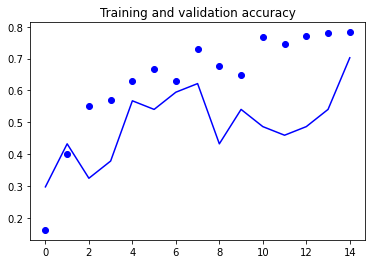

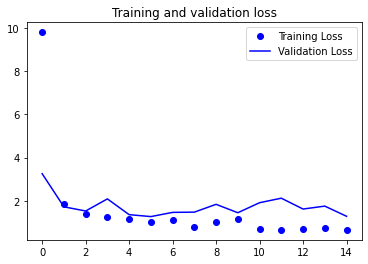

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')


plt.figure()


plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()


In [22]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1)
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_labels,
directory=TEST_DIR,
x_col="Image",
y_col=None,
batch_size=16,
seed=42,
shuffle=False,
class_mode=None,
target_size=(224,224))

Found 156 validated image filenames.


In [23]:
classification = model.predict(test_generator)

In [24]:
classification.shape

(156, 8)

In [25]:
target = []
for i in range(156):
     target.append(CLASSES[np.argmax(classification[i])])

In [26]:
test_labels['target'] = target

In [27]:
test_labels.head()

,Image,target
0,508.jpg,kathakali
1,246.jpg,kathakali
2,473.jpg,kathak
3,485.jpg,kathakali
4,128.jpg,kathakali


In [28]:
test_labels.to_csv("test1.csv", index=False)

In [29]:
os.listdir("/kaggle/working/")

['__notebook__.ipynb', 'test1.csv']